In [1]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [2]:
# Get ready
dir_apo_hbo = "/home/pbarletta/labo/20/reobp/run/apo/hbond"

aa = 119
nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

idx_of_titrable = fill(0, aa)
[ idx_of_titrable[titrable_resis[i]] = i for i in 1:titrable_cnt ];

titrable_residues = [ string(titrable_resnames[i], "_", titrable_resis[i]) 
    for i in 1:titrable_cnt ];

In [3]:
for i in 1:12
    PH = convert(Int64, phs[i] * 10)
#     global nhb_apo_idx = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_hbo, string(idx[i]),
#             string("nhb_apo_", idx[i])))[2:end, 2])
    global nhb_apo_phs = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_hbo, string(phs[i]),
            string("nhb_apo_", phs[i])))[2:end, 2])

#     sym_nhb_apo_idx = Symbol("nhb_apo_", idx[i])
    sym_nhb_apo_phs = Symbol("nhb_apo_", PH)
#     eval(:($sym_nhb_apo_idx = nhb_apo_idx))
    eval(:($sym_nhb_apo_phs = nhb_apo_phs))
end

## hbonds count por pH

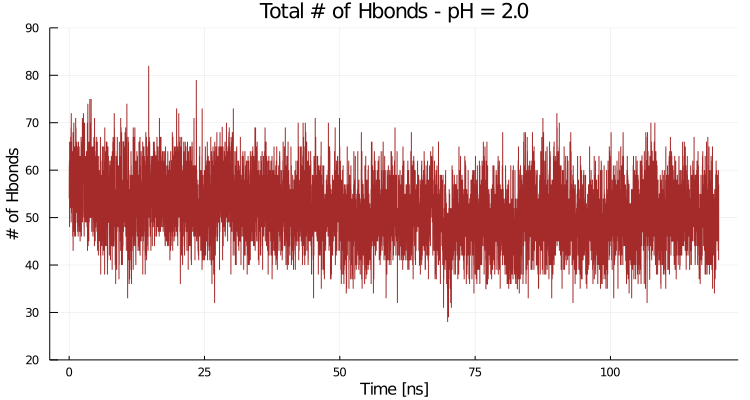

In [4]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_20,
    title = string("Total # of Hbonds - pH = ",2.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

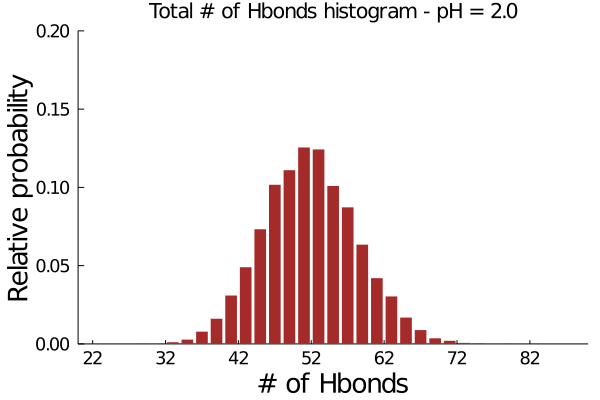

In [5]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_20))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_20, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",2.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

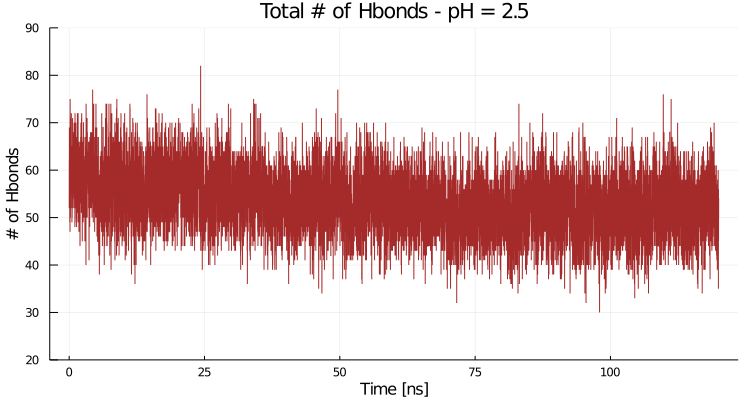

In [6]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_25,
    title = string("Total # of Hbonds - pH = ",2.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

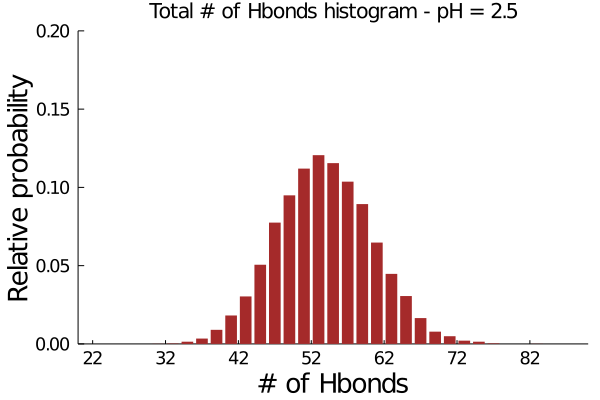

In [7]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_25))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_25, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",2.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

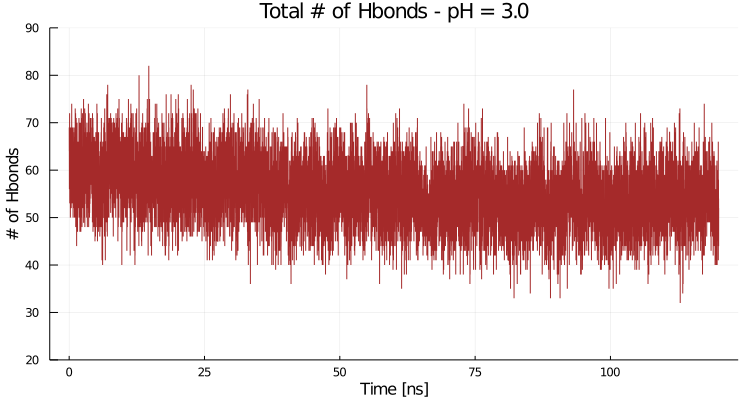

In [8]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_30,
    title = string("Total # of Hbonds - pH = ",3.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

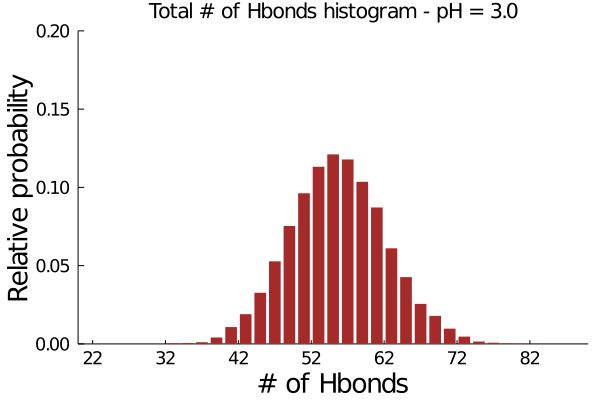

In [9]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_30))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_30, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",3.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

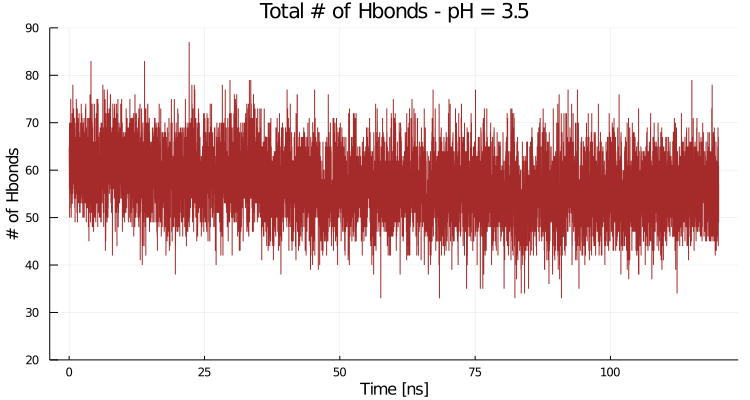

In [10]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_35,
    title = string("Total # of Hbonds - pH = ",3.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

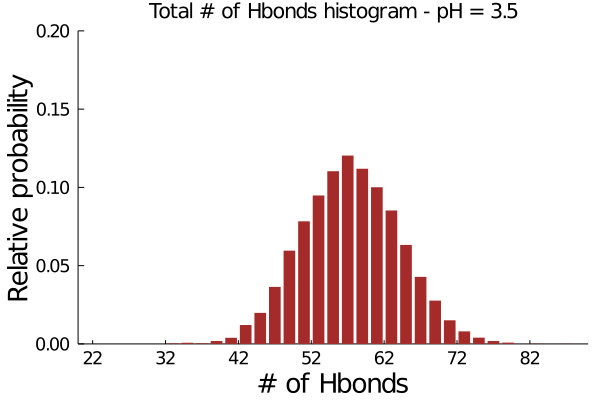

In [11]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_35))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_35, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",3.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

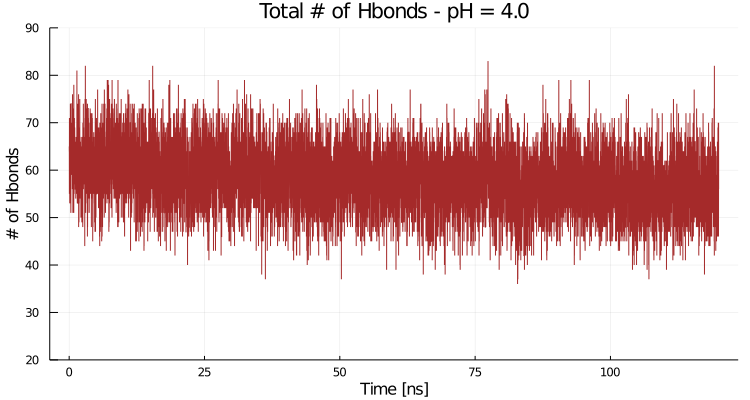

In [12]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_40,
    title = string("Total # of Hbonds - pH = ",4.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

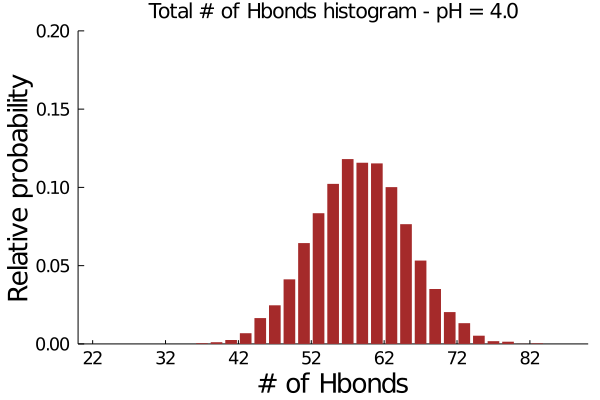

In [13]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_40))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_40, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",4.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

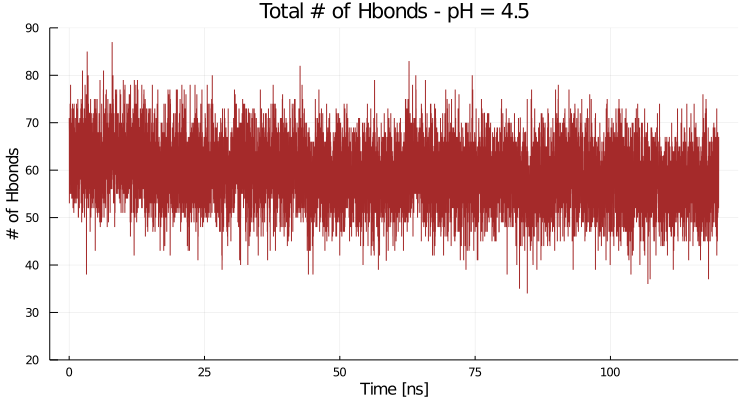

In [14]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_45,
    title = string("Total # of Hbonds - pH = ",4.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

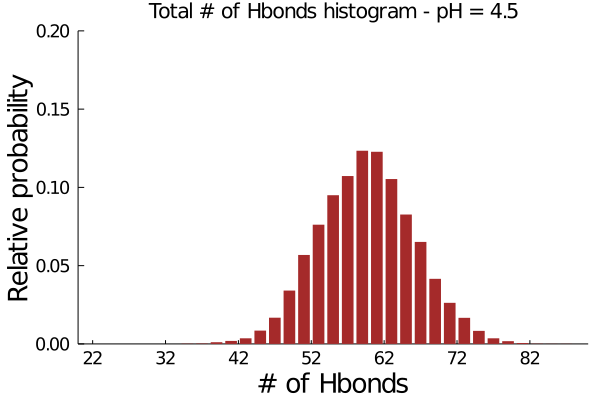

In [15]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_45))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_45, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",4.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

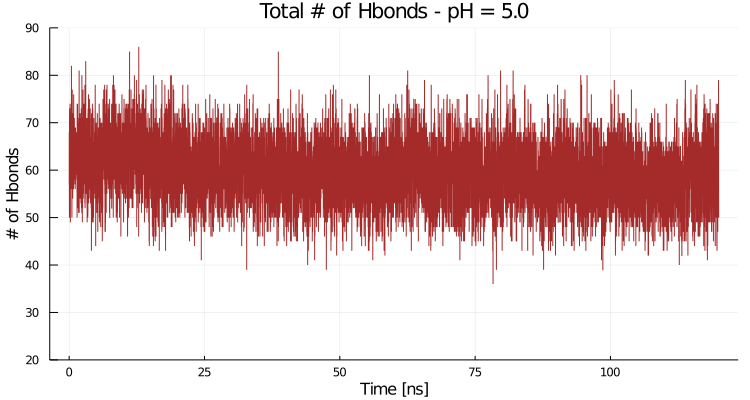

In [16]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_50,
    title = string("Total # of Hbonds - pH = ",5.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

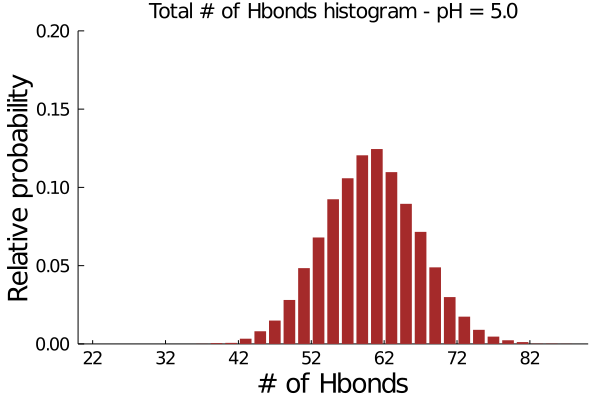

In [17]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_50))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_50, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",5.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

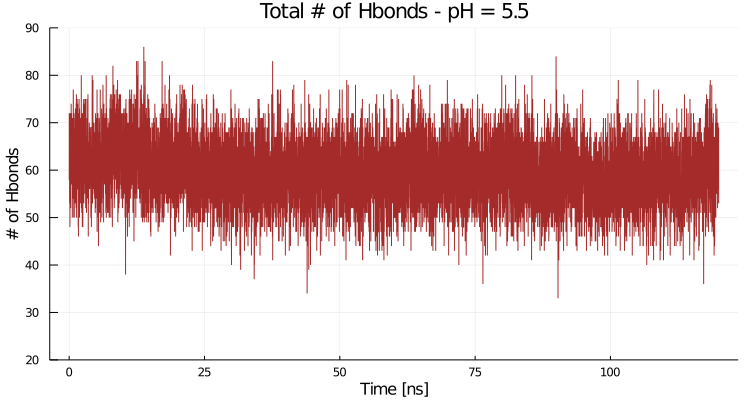

In [18]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_55,
    title = string("Total # of Hbonds - pH = ",5.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

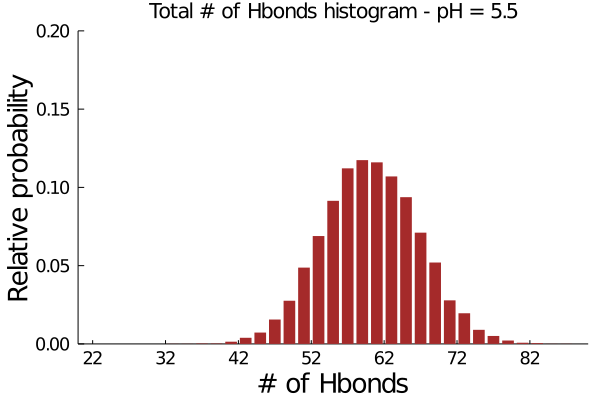

In [19]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_55))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_55, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",5.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

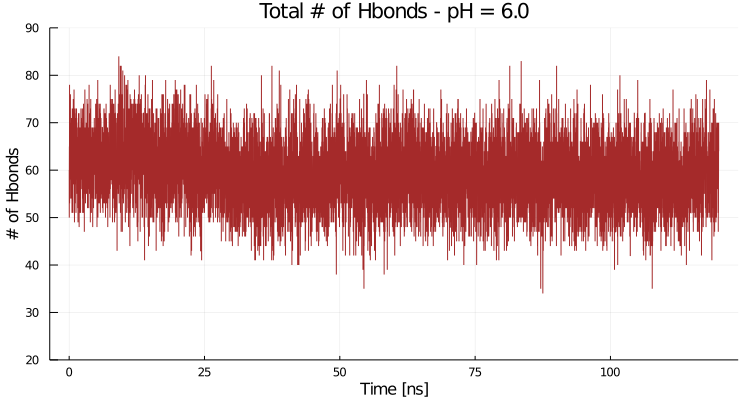

In [20]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_60,
    title = string("Total # of Hbonds - pH = ",6.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

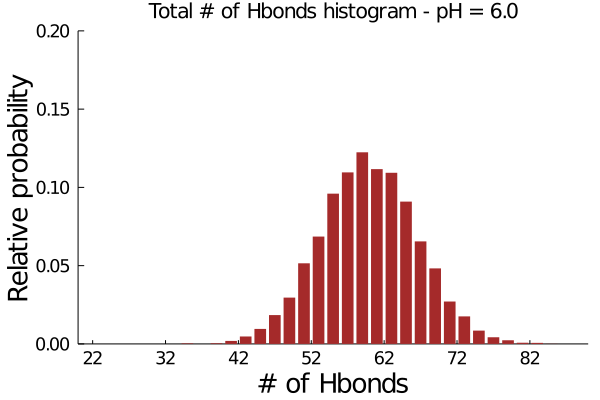

In [21]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_60))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_60, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",6.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

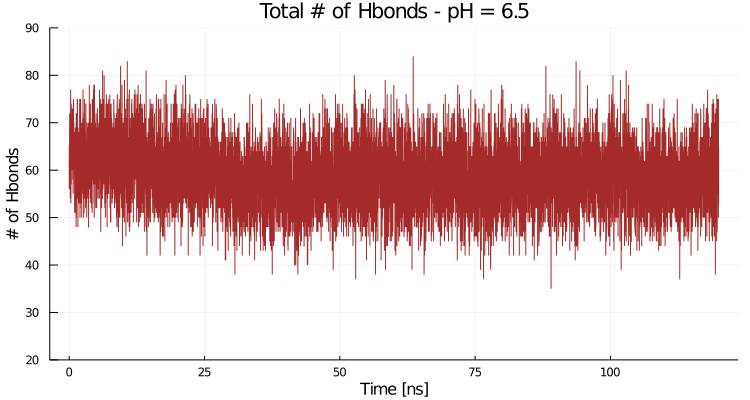

In [22]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_65,
    title = string("Total # of Hbonds - pH = ",6.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

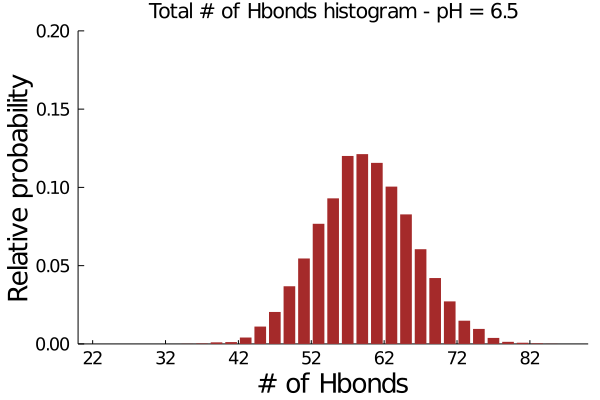

In [23]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_65))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_65, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",6.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

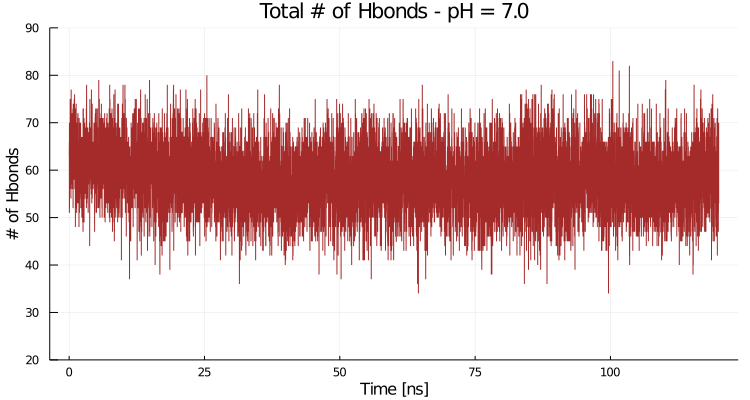

In [24]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_70,
    title = string("Total # of Hbonds - pH = ",7.0), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

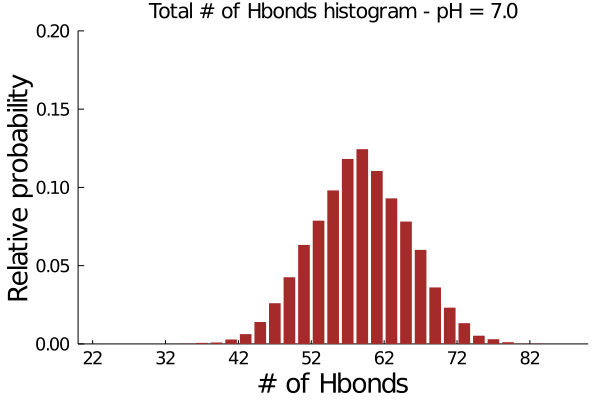

In [25]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_70))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_70, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",7.0),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

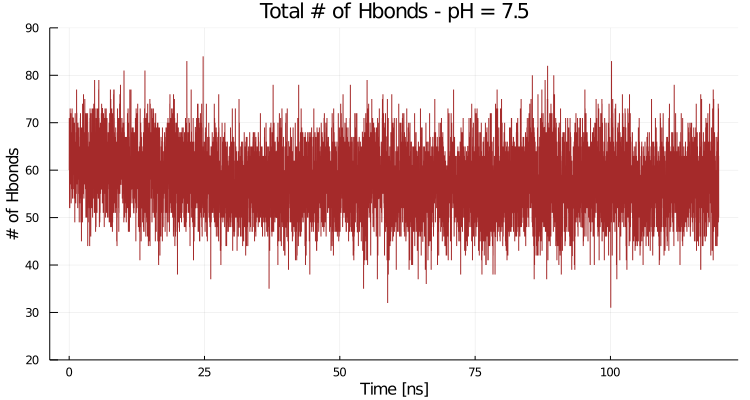

In [26]:
min_nhb = 20
max_nhb = 90
plot(collect(1:nstlim) ./ 100, nhb_apo_75,
    title = string("Total # of Hbonds - pH = ",7.5), size = (750, 400),
    ylims = (min_nhb, max_nhb), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "# of Hbonds", xaxis = "Time [ns]")

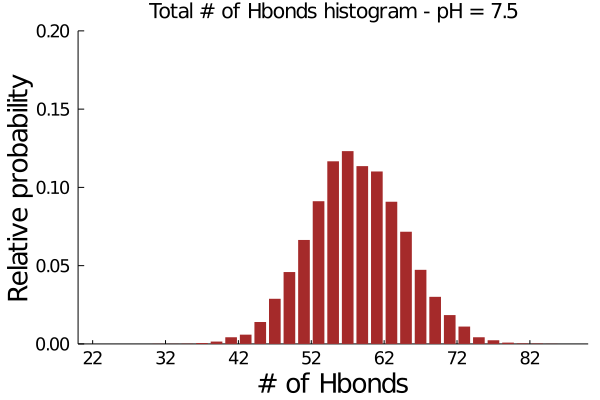

In [27]:
st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_75))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_75, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Total # of Hbonds histogram - pH = ",7.5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

In [28]:
vals = vcat([ mean(nhb_apo_20) std(nhb_apo_20) std(nhb_apo_20) / mean(nhb_apo_20) ],
[ mean(nhb_apo_25) std(nhb_apo_25) std(nhb_apo_25) / mean(nhb_apo_25) ],
[ mean(nhb_apo_30) std(nhb_apo_30) std(nhb_apo_30) / mean(nhb_apo_30) ],
[ mean(nhb_apo_35) std(nhb_apo_35) std(nhb_apo_35) / mean(nhb_apo_35) ],
[ mean(nhb_apo_40) std(nhb_apo_40) std(nhb_apo_40) / mean(nhb_apo_40) ],
[ mean(nhb_apo_45) std(nhb_apo_45) std(nhb_apo_45) / mean(nhb_apo_45) ],
[ mean(nhb_apo_50) std(nhb_apo_50) std(nhb_apo_50) / mean(nhb_apo_50) ],
[ mean(nhb_apo_55) std(nhb_apo_55) std(nhb_apo_55) / mean(nhb_apo_55) ],
[ mean(nhb_apo_60) std(nhb_apo_60) std(nhb_apo_60) / mean(nhb_apo_60) ],
[ mean(nhb_apo_65) std(nhb_apo_65) std(nhb_apo_65) / mean(nhb_apo_65) ],
[ mean(nhb_apo_70) std(nhb_apo_70) std(nhb_apo_70) / mean(nhb_apo_70) ],
[ mean(nhb_apo_75) std(nhb_apo_75) std(nhb_apo_75) / mean(nhb_apo_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

12×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
2.0   │  51.3421   6.41683  0.124982
2.5   │  53.3368   6.55003  0.122805
3.0   │  55.1507   6.57055  0.119138
3.5   │  56.9241   6.66576  0.117099
4.0   │  58.1679   6.55219  0.112643
4.5   │  59.1077    6.5029  0.110018
5.0   │  59.6668   6.47517  0.108522
5.5   │  59.6804    6.5533  0.109806
6.0   │  59.3733   6.59361  0.111053
6.5   │   58.954   6.58877  0.111761
7.0   │  58.3028   6.61542  0.113467
7.5   │  57.6948    6.5079  0.112799

## hbonds count por idx

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_1))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_1, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 1),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_1))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_1, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 1),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_2))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_2, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 2),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_2))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_2, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 2),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_3))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_3, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 3),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_3))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_3, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 3),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_4))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_4, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 4),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_4))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_4, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 4),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_5))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_5, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_5))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_5, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 5),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_6))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_6, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 6),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_6))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_6, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 6),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_7))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_7, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 7),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_7))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_7, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 7),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_8))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_8, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 8),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_8))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_8, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 8),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_9))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_9, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 9),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_9))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_9, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 9),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_10))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_10, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 10),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

st = 2
bin_nhb = collect(min_nhb:st:max_nhb)
wgh_nhb = fill(1.0, length(nhb_apo_10))

# Histograma ponderado
Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_10, bin_nhb, wgh_nhb, true, false);

bar(Wbins_nhb, Whis_nhb,
    xlims = (min_nhb, max_nhb), ylims = (0, .2),
    xticks = min_nhb+st:10:max_nhb+st,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("H bonds count histogram - pH = ", 10),
    yaxis = "Relative probability", xaxis = "# of Hbonds")

vals = vcat([ mean(nhb_apo_1) std(nhb_apo_1) std(nhb_apo_1) / mean(nhb_apo_1) ],
[ mean(nhb_apo_2) std(nhb_apo_2) std(nhb_apo_2) / mean(nhb_apo_2) ],
[ mean(nhb_apo_3) std(nhb_apo_3) std(nhb_apo_3) / mean(nhb_apo_3) ],
[ mean(nhb_apo_4) std(nhb_apo_4) std(nhb_apo_4) / mean(nhb_apo_4) ],
[ mean(nhb_apo_5) std(nhb_apo_5) std(nhb_apo_5) / mean(nhb_apo_5) ],
[ mean(nhb_apo_6) std(nhb_apo_6) std(nhb_apo_6) / mean(nhb_apo_6) ],
[ mean(nhb_apo_7) std(nhb_apo_7) std(nhb_apo_7) / mean(nhb_apo_7) ],
[ mean(nhb_apo_8) std(nhb_apo_8) std(nhb_apo_8) / mean(nhb_apo_8) ],
[ mean(nhb_apo_9) std(nhb_apo_9) std(nhb_apo_9) / mean(nhb_apo_9) ],
[ mean(nhb_apo_10) std(nhb_apo_10) std(nhb_apo_10) / mean(nhb_apo_10) ],
[ mean(nhb_apo_11) std(nhb_apo_11) std(nhb_apo_11) / mean(nhb_apo_11) ],
[ mean(nhb_apo_12) std(nhb_apo_12) std(nhb_apo_12) / mean(nhb_apo_12) ])

NamedArray(vals, (string.(idx), ["μ" ; "std" ; "μ/std"]))

## hbonds count por idx

In [29]:
nhb_cnt_apo_acc_phs = Array{Int64, 2}(undef, aa, 0)
nhb_cnt_apo_don_phs = Array{Int64, 2}(undef, aa, 0)

for ph in phs
    nhb_ser_apo_acc_ph = fill(0, (aa, nstlim))
    nhb_ser_apo_don_ph = fill(0, (aa, nstlim))
    
    temporal_acc = readdlm(joinpath(dir_apo_hbo, string(ph),
        string("series_nhb_apo_gl4_as4_lys_acc_", ph)), header = true)
    
    temporal_don = readdlm(joinpath(dir_apo_hbo, string(ph),
        string("series_nhb_apo_gl4_as4_lys_don_", ph)), header = true)
    
    res_hbo_apo_acc_phs = convert(Array{Bool, 2}, temporal_acc[1][:, 2:end])
    acceptor_donor_acc = convert(Array{String, 1}, temporal_acc[2][2:end])
    
    res_hbo_apo_don_phs = convert(Array{Bool, 2}, temporal_don[1][:, 2:end])
    acceptor_donor_don = convert(Array{String, 1}, temporal_don[2][2:end])
    

    for i = 1:nstlim  
        mascara_acc = findall(res_hbo_apo_acc_phs[i, :])
        mascara_don = findall(res_hbo_apo_don_phs[i, :])
        
        for j in mascara_acc
            acceptor, donor = split(acceptor_donor_acc[j], "-")
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            nhb_ser_apo_acc_ph[don, i] += 1
            nhb_ser_apo_acc_ph[acc, i] += 1
        end
        
        for j in mascara_don
            acceptor, donor = split(acceptor_donor_don[j], "-")
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            nhb_ser_apo_don_ph[don, i] += 1
            nhb_ser_apo_don_ph[acc, i] += 1
        end
    end

    nhb_cnt_apo_acc_ph = mapslices(x -> sum(x), nhb_ser_apo_acc_ph, dims = 2)[:, 1]
    global nhb_cnt_apo_acc_phs = hcat(nhb_cnt_apo_acc_phs, nhb_cnt_apo_acc_ph)
    
    nhb_cnt_apo_don_ph = mapslices(x -> sum(x), nhb_ser_apo_don_ph, dims = 2)[:, 1]
    global nhb_cnt_apo_don_phs = hcat(nhb_cnt_apo_don_phs, nhb_cnt_apo_don_ph)
    
end

In [30]:
nhb_cnt_apo_phs = nhb_cnt_apo_acc_phs .+ nhb_cnt_apo_don_phs;

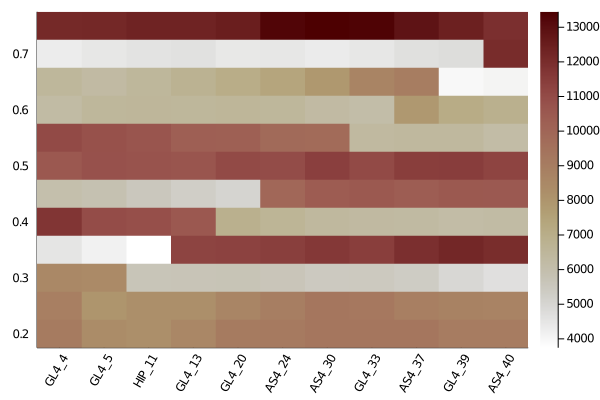

In [31]:
heatmap(titrable_residues[1:11], (phs ./ 10), nhb_cnt_apo_phs[titrable_resis[1:11], :],
    xrotation = 60, color = :bilbao)

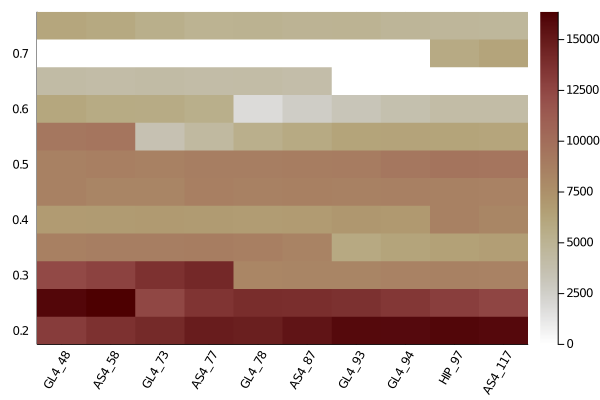

In [32]:
heatmap(titrable_residues[12:21], (phs ./ 10), nhb_cnt_apo_phs[titrable_resis[12:21], :],
    xrotation = 60, color = :bilbao)